In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Observations:
Customer Id isn't important when building machine learning models. I will go ahead and remove that column from my analysis.

In [4]:
# Drop customer ID column

df.drop('customerID', axis= 'columns', inplace=True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


Customer ID is not there anymore. You can also see the data type.

Total charges is an object, however monthly charges is still an object even though both values are the same format.

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
# Change from object to float. I also want to view how many of them are null

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [8]:
df.shape

(7043, 20)

Since there are 11 missing rows out of 7043, I will go ahead and drop those rows.

In [9]:
#drop those missing rows
df = df[df['TotalCharges'] != ' ']

In [10]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<ipython-input-10-e4980e5e83ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [11]:
df.TotalCharges.dtypes

dtype('float64')

Now monthly charges and total charges are both float

#Data Exploration and cleaning

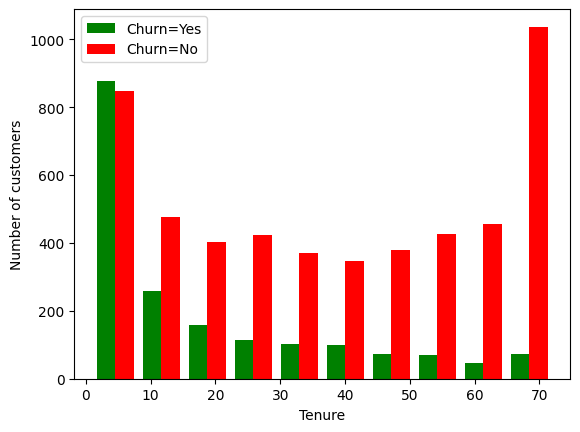

In [12]:
# Lets look into how loyal the customer is (Tenure) and the ones that are not leaving

tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.legend()

In [13]:
# find out unique values of object column to help with hot encoding later

def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [14]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Observations:

Some questions that are yes and no also show values such as "no internet service". Another one says no internet service.

In [15]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [16]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
# replace yes and no with 1 or 0

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-17-e7942c12d85e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes': 1, 'No': 0}, inplace=True)
<ipython-input-17-e7942c12d85e>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [18]:
#print to check if it shows
for col in df:
  print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [19]:
# work on male and female column

df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

<ipython-input-19-f90573ddf3a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
<ipython-input-19-f90573ddf3a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [20]:
df['gender'].unique()

array([1, 0])

In [21]:
# one hot encoding for internet service
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

# Convert all boolean columns to integers
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

In [22]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [23]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


# Scaling
Since some of the values hold different weight. I need to scale those values. Such as tenure, monthly charges, and total charges

In [24]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [25]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4830,0,0,1,0,0.746479,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
6536,0,0,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


# Train and Split

In [26]:
X =  df.drop('Churn', axis='columns')
y = df['Churn']

In [27]:
# train and split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [28]:
X_train.shape

(5625, 26)

In [29]:
X_test.shape

(1407, 26)

In [30]:
# columns in train df

len(X_train.columns)

26

In [42]:
# import tensorflow libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), # same number as columns
    keras.layers.Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=5,             # Stop after 5 epochs of no improvement
    restore_best_weights=True # Restore the best weights after stopping
)


# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,   # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6016 - loss: 0.6503 - val_accuracy: 0.7538 - val_loss: 0.4926
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4660 - val_accuracy: 0.7867 - val_loss: 0.4482
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4369 - val_accuracy: 0.7858 - val_loss: 0.4405
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4114 - val_accuracy: 0.7902 - val_loss: 0.4376
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4152 - val_accuracy: 0.7840 - val_loss: 0.4355
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4199 - val_accuracy: 0.7876 - val_loss: 0.4334
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4207 - val_accuracy: 0.7813 - val_loss: 0.4350
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4195 - val_accuracy: 0.7858

After running 100 epochs, my accuracy is 82%

In [44]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4307 


[0.43972048163414, 0.7882018685340881]

In [45]:
# Test

y_predicted = model.predict(X_test)
y_predicted[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.2090195 ],
       [0.3324251 ],
       [0.00992452],
       [0.71484476],
       [0.47626838],
       [0.69737417],
       [0.08312402],
       [0.61880463],
       [0.4213767 ],
       [0.12335547]], dtype=float32)

In [46]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


It is showing me 2D array and I want to convert it into 1D array since y test is either 0 or 1.

If it is more than 0.5, i will convert it to 1 and if it is anything less than that, I will convert it to 0.

In [47]:
# run a for loop

y_pred = []
for element in y_predicted:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [48]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

Comparing y_test to:

y pred

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

It is getting about 80% accuracy which is expected

In [54]:
# lets do classification reports

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Performance of the overall model:



<Figure size 1000x700 with 0 Axes>

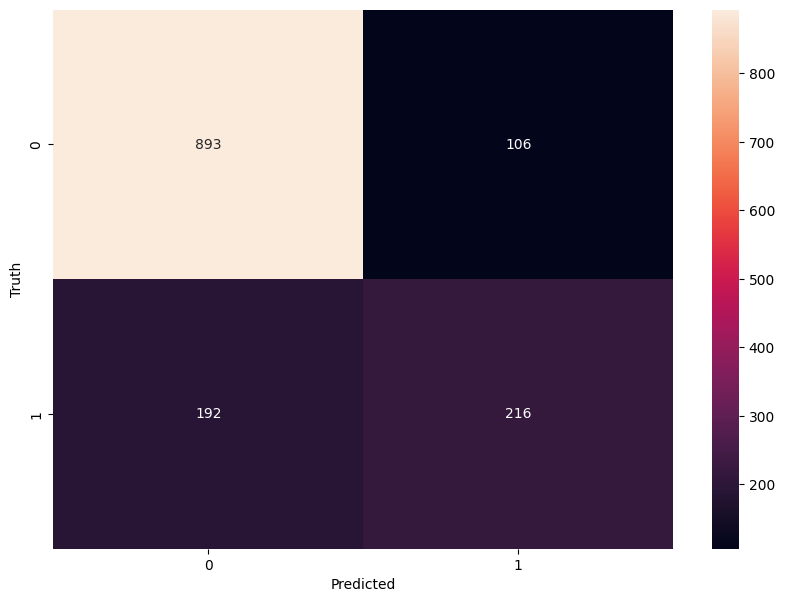

<Figure size 1000x700 with 0 Axes>

In [50]:
# confusion matrix

import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(10,7))

The diagonal shows that is the number of times my model predicted accuractely.

Correct prediction: 893 + 216 = 1109

Incorrect prediction: 106 + 192 = 298

In [51]:
# Total accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.7882018479033405

In [53]:
#can also do it manually
round((893+216)/(893+106+192+216),2)

0.79

                    precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

The accuracy score matches the accuracy score from the classification report.

Precision for 0 Class: customers who left the business (did not churn)- out of the predicitions my model made (1109) is 82%

Precision for 1 Class: customers who stayed (did churn)- is 67%

Recall: Total truth